# **ARIMA Model (Auto Regressive Integrated Moving Average)**


Linear Regression Model gives us prediction for specific number of month.

But given a date if you want to have the prediction on that specific date use ARIMA model.

ARIMA model is good only on stationary dataset. It can not perform good on non-stationary dataset. For that we have 'd' parameter (differencing out) in ARIMA model which transforms non-stationary data to stationary data. Order is (p,d,q)

ACF (Autocorrelation function) graph tells you about all the lag variables which are directly or indirectly impacting your current variable.

PACF (Partial Autocorrelation function) does the same as regular ACF but it shows only the direct effect and all intermediary effects are removed.


In [ ]:
pip install pmdarima

AR(p): Auto Regressive Model: will try to use those lagged variables which have direct impact on current version of data. For this PACF graph can be plotted.

MA(q): Moving Average Model: Makes use of error data points. Gradient Boosting and XGBM are also trained on error data points. MA model predicts error. Uses lagged variables which have direct or indirect impact on current data. For that use ACF graph.

ARMA: Combination of AR and MA model

ARIMA: Integrated(d)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
# adfuller checks if data is stationary or non-stationary (Augmented Dickey-Fuller (ADF) test)

from statsmodels.tsa.arima.model import ARIMA
# ARIMA function for model building

from pmdarima import auto_arima
# from auto_arima we will get order of p,d,q

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
df = pd.read_csv('AveargeTemp.csv', index_col=0, parse_dates=True)
# parse_dates=True tells python that index column is date time column

df

In [ ]:
df['AvgTemp']

**Check stationarity of the data**

<Axes: xlabel='DATE'>

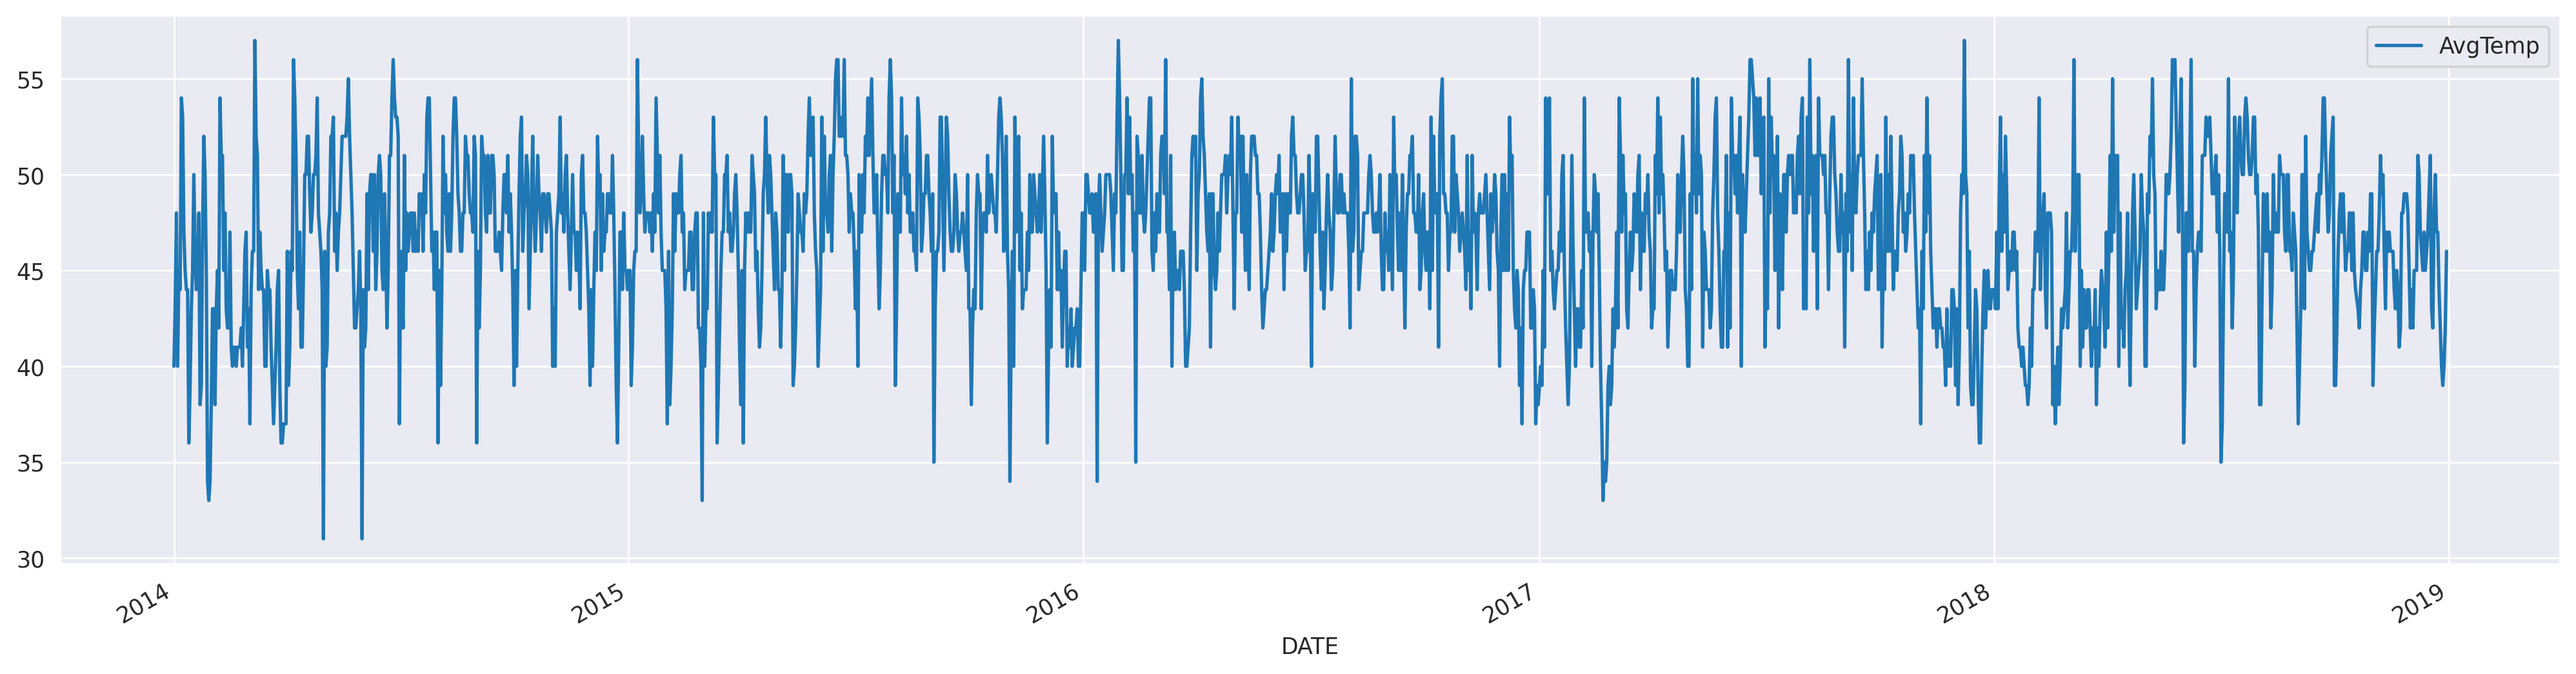

In [ ]:
df.plot()

- We can see that it seems to have somewhat of a constant mean around 45. And the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not we will run adfuller test.

In [ ]:
adfuller(df['AvgTemp'])[1]

8.675937480199653e-09

**Null hypothesis: Data is Non stationary**

**Alternate Hypothesis: Data is Stationary**
   


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

**According the p-value, the dataset is stationary as the p value is less than alpha value.**

# Arima model building.
- ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
- First, we need to find out the order of arima model.

In [ ]:
#find out order of arima

In [ ]:
order = auto_arima(df['AvgTemp'])

In [ ]:
order

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
df.shape

(1821, 1)

In [ ]:
#Split the data
train = df.iloc[:-30]
test = df.iloc[-30:]

In [ ]:
train.shape

(1791, 1)

In [ ]:
train

In [ ]:
test.shape

In [ ]:
#Arima model

In [ ]:
model = ARIMA(train['AvgTemp'], order=(1, 0, 5)).fit()

# Evaluating the model

In [ ]:
test

In [ ]:
train

In [ ]:
ypred = model.predict(start =1791, end = 1820)
ypred

In [ ]:
print(np.sqrt(mean_squared_error(test['AvgTemp'], ypred)))

3.000463825206671
